# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1990 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Afin d'éviter de télécharger les données depuis l'URL donnée précédemment à chaque exécution et pour nous prémunir d'une modification ou disparition des données on les récupère en local. C'est ce fichier local dont le nom est dans la variable `data_file` que l'on utilisera. Les données sont téléchargés uniquement si le fichier local manque.

In [3]:
data_file = "incidence_varicelle.csv"

import os
if not os.access(data_file, os.R_OK):
    import urllib.request
    print("Les données n'existent pas en local, on les télécharges.")
    urllib.request.urlretrieve(data_url, data_file)
    if os.access(data_file, os.R_OK):
        print("Fichier récupéré.")
    else:
        raise Exception("Le fichier n'a pas pu être récupéré !")
else:
    print("Les données sont déjà présentes en local.")

Les données sont déjà présentes en local.


Le format de données est le même que pour le syndrome grippal.

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202022          7    280        0     638       0           0   
1     202021          7    602       36    1168       1           0   
2     202020          7    824       20    1628       1           0   
3     202019          7    310        0     753       0           0   
4     202018          7    849       98    1600       1           0   
5     202017          7    272        0     658       0           0   
6     202016          7    758       78    1438       1           0   
7     202015          7   1918      675    3161       3           1   
8     202014          7   3879     2227    5531       6           3   
9     202013          7   7326     5236    9416      11           8   
10    202012          7   8123     5790   10456      12           8   
11    202011          7  10198     7568   12828      15          11   
12    202010          7   9011     6691   11331      14          10   
13    202009          7  13631    10544   16718      21          16   
14    202008          7  10424     7708   13140      16          12   
15    202007          7   8959     6574   11344      14          10   
16    202006          7   9264     6925   11603      14          10   
17    202005          7   8505     6314   10696      13          10   
18    202004          7   7991     5831   10151      12           9   
19    202003          7   5968     4100    7836       9           6   
20    202002          7   6534     4530    8538      10           7   
21    202001          7   9835     7019   12651      15          11   
22    201952          7   7941     5246   10636      12           8   
23    201951          7   5823     3675    7971       9           6   
24    201950          7   6424     4276    8572      10           7   
25    201949          7   6621     4540    8702      10           7   
26    201948          7   5542     3383    7701       8           5   
27    201947          7   7536     5058   10014      11           7   
28    201946          7   2638     1316    3960       4           2   
29    201945          7   4492     2615    6369       7           4   
...      ...        ...    ...      ...     ...     ...         ...   
1509  199126          7  17608    11304   23912      31          20   
1510  199125          7  16169    10700   21638      28          18   
1511  199124          7  16171    10071   22271      28          17   
1512  199123          7  11947     7671   16223      21          13   
1513  199122          7  15452     9953   20951      27          17   
1514  199121          7  14903     8975   20831      26          16   
1515  199120          7  19053    12742   25364      34          23   
1516  199119          7  16739    11246   22232      29          19   
1517  199118          7  21385    13882   28888      38          25   
1518  199117          7  13462     8877   18047      24          16   
1519  199116          7  14857    10068   19646      26          18   
1520  199115          7  13975     9781   18169      25          18   
1521  199114          7  12265     7684   16846      22          14   
1522  199113          7   9567     6041   13093      17          11   
1523  199112          7  10864     7331   14397      19          13   
1524  199111          7  15574    11184   19964      27          19   
1525  199110          7  16643    11372   21914      29          20   
1526  199109          7  13741     8780   18702      24          15   
1527  199108          7  13289     8813   17765      23          15   
1528  199107          7  12337     8077   16597      22          15   
1529  199106          7  10877     7013   14741      19          12   
1530  199105          7  10442     6544   14340      18          11   
1531  199104          7   7913     4563   11263      14           8   
1532  199103          7  15387    10484   20290      27          18   
1533  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ?

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Visiblement non, pas de point manquant.

Les semaines sont numérotés de la même façon que pour le syndrome grippal on va donc les décoder suivant la même procédure.

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']] # ici on utilise raw_data car on a pas eu à retoucher aux données.

# Tri par ordre chronologique
sorted_data = raw_data.set_index('period').sort_index()

Comme pour le syndrone gripal nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laissons une "marge d'erreur" d'une seconde.

Il ne devrait y avoir aucun trou car nous avons normalement toutes les semaines.

In [7]:
periods = sorted_data.index
il_y_a_un_probleme = False
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)
        il_y_a_un_probleme = True

if not il_y_a_un_probleme:
    print("Aucun problème trouvé.")

Aucun problème trouvé.


Un premier regard sur les données !

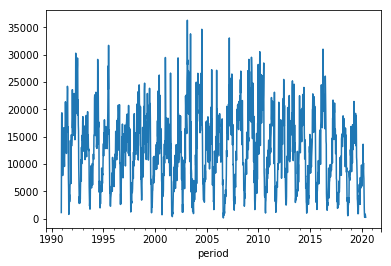

In [8]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation.

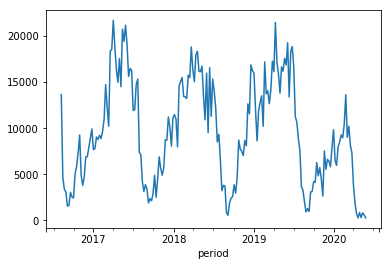

In [9]:
sorted_data['inc'][-200:].plot()

## Etude de la variabilité moyenne sur un an

contrairement à la grippe il n'y a pas de période large où l'on peut dire qu'il n'y a rien. Il y a bien des chutes importantes vers le 3e trimestre mais il faudra être plus précis pour découper les données en années.

[]

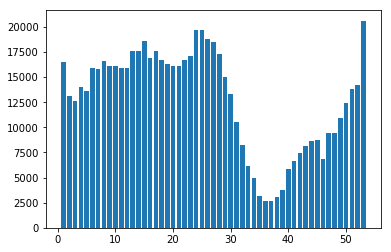

In [10]:
import statistics

weeks_t = dict()
for i in range(len(raw_data["week"])):      # sorted_data cause des répétitions et suppressions de lignes très bizares, de troutes façon on a pas besoin d'avoir un tri donc on ne trie pas.
    num_week = int(str(raw_data["week"][i])[-2:])
    num_inc = int(raw_data["inc"][i])
    if not num_week in weeks_t:
        weeks_t[num_week] = []
    weeks_t[num_week].append(num_inc)

weeks = dict()
for week in weeks_t:
    weeks[week] = statistics.mean(weeks_t[week])

plt.bar(list(weeks.keys()), list(weeks.values()), align='center')
plt.plot()

On essaye de voir où ce trouve le minimum

In [11]:
val_min = min(weeks.values())
week_min = None
for week in weeks:
    if val_min == weeks[week]:
        week_min = week

print("Le minimum est de %.1f durant la semaine %i." % (val_min, week_min))

for delta in range(-1, 2):
    print("Semaine %d : %.1f" % ((week_min+delta), weeks[week_min+delta]))

Le minimum est de 2631.9 durant la semaine 36.
Semaine 35 : 3182.0
Semaine 36 : 2631.9
Semaine 37 : 2655.5


On va donc couper l'année entre la semaine 36 et 37.

## Etude de l'incidence annuelle (coupe après la semaine 36)

In [12]:
cas_par_annee_t = dict()
for i in range(len(raw_data["week"])):                   # Usage de raw_data particulièrement critique ici
    num_year = int(str(raw_data["week"][i])[:4])
    num_week = int(str(raw_data["week"][i])[-2:])
    num_inc = int(raw_data["inc"][i])

    # Fin de l'année précédente ?
    if num_week <= week_min:
        num_year = num_year - 1

    #print("%d-%d => %d : %d" % (int(str(raw_data["week"][i])[:4]), num_week, num_year, num_inc))

    # Rajoute aux cas
    if not num_year in cas_par_annee_t:
        cas_par_annee_t[num_year] = []
    cas_par_annee_t[num_year].append(num_inc)

# Sommes par année
cas_par_annee = dict()
for year in cas_par_annee_t:
    nb_sem = len(cas_par_annee_t[year])
    #print(cas_par_annee_t[year])
    if nb_sem >= 51:
        somme = sum(cas_par_annee_t[year])
        print("%d : %d cas" % (year, somme))
        cas_par_annee[year] = somme
    else:
        print("L'année %d n'a que %d semaines avec des données." % (year, nb_sem))

L'année 2019 n'a que 38 semaines avec des données.
2018 : 584834 cas
2017 : 538421 cas
2016 : 553188 cas
2015 : 781437 cas
2014 : 605469 cas
2013 : 681567 cas
2012 : 697854 cas
2011 : 622706 cas
2010 : 644204 cas
2009 : 835706 cas
2008 : 841233 cas
2007 : 747248 cas
2006 : 720969 cas
2005 : 627774 cas
2004 : 629836 cas
2003 : 778914 cas
2002 : 758094 cas
2001 : 517623 cas
2000 : 614635 cas
1999 : 621746 cas
1998 : 753288 cas
1997 : 681363 cas
1996 : 679000 cas
1995 : 567254 cas
1994 : 651659 cas
1993 : 661527 cas
1992 : 646135 cas
1991 : 831882 cas
L'année 1990 n'a que 40 semaines avec des données.


[]

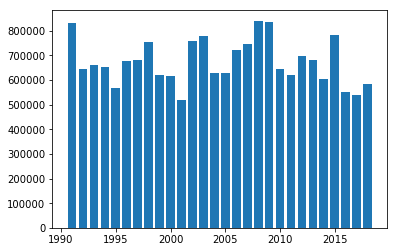

In [13]:
plt.bar(list(cas_par_annee.keys()), list(cas_par_annee.values()), align='center')
plt.plot()

Calcul des extrèmes

In [14]:
val_annee_min = min(cas_par_annee.values())
val_annee_max = max(cas_par_annee.values())
annee_min = None
annee_max = None
for annee in cas_par_annee:
    if val_annee_min == cas_par_annee[annee]:
        annee_min = annee
    if val_annee_max == cas_par_annee[annee]:
        annee_max = annee

print("Le minimum est de %d durant l'année' %i-%i." % (val_annee_min, annee_min, annee_min+1))
print("Le maximum est de %d durant l'année' %i-%i." % (val_annee_max, annee_max, annee_max+1))

Le minimum est de 517623 durant l'année' 2001-2002.
Le maximum est de 841233 durant l'année' 2008-2009.


Sauf que voila ... en fait il fallait couper au 1er septembre. Bon, du coup je vais pouvoir reprendre le code préexistant que le syndrôme gripal. En plus c'est mieux vu ma maitrise de ces libs ...

## Etude de l'incidence annuelle (coupe au 1er septembre)

On reprend donc le code du syndrome grippal mais cette fois il y a un bug, l'assertion ne passe pas car l'année 1990 à des données pour 38 semaines. Je l'ai donc exclue de l'analyse.

In [16]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1], first_sept_week[1:]):
    if week1.year != 1990:                              # Année 1990 exclue car données partielles.
        one_year = sorted_data['inc'][week1:week2-1]
        assert abs(len(one_year)-52) < 2, "L'année %d à des données pour %d semaines !" % (week1.year, len(one_year))
        yearly_incidence.append(one_year.sum())
        year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

On regarde les incidences :

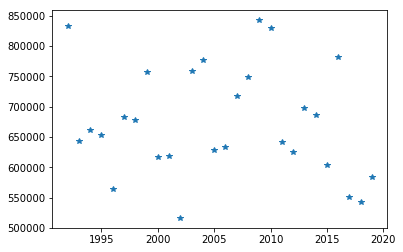

In [18]:
yearly_incidence.plot(style='*')

On peut maintenant faire une liste des incidence par nombre de cas par année :

In [20]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

On voit l'année avec le minimum et le maximum.